In [100]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd

In [101]:
data = pd.read_csv("G:\ML projects\Projects\AdFlow Budget Optimizer\Data\marketing_dataset_USA_daily_2000.csv")
data = data.drop("Campaign_ID",axis=1)
pd.set_option('display.float_format', '{:.10f}'.format)
data.iloc[:,1].unique()

array(['Awareness', 'Traffic', 'Conversions'], dtype=object)

In [102]:
data.nunique()

data.iloc[:,0] = data.iloc[:,0].map({"TikTok":0,"Facebook":1,"Google":2}).astype(float)
data.iloc[:,1] = data.iloc[:,1].map({"Traffic":0,"Awareness":1,"Conversions":2})

data.iloc[:,1].unique()

array([1, 0, 2], dtype=object)

In [103]:
data

,Platform,Objective,CTR_est,CPC_est,Historical_CPC,Historical_ConvRate,Historical_Budget,Best_Source_Score,Leads_Forward,Leads_Rejected,Qualification_Rate,Active_Leads,Suggested_Budget
0,2.0000000000,1,0.0310000000,2.7800000000,1.7700000000,0.0580000000,351,0.5600000000,0,8,0.4300000000,32,122
1,0.0000000000,1,0.0340000000,1.1400000000,1.8700000000,0.0510000000,378,0.8400000000,0,8,0.8900000000,15,148
2,1.0000000000,0,0.0240000000,2.1900000000,1.3300000000,0.0880000000,137,0.8500000000,15,8,0.3900000000,11,103
3,1.0000000000,2,0.0470000000,2.2900000000,1.7900000000,0.1190000000,380,0.9200000000,0,6,0.4000000000,14,143
4,1.0000000000,0,0.0310000000,2.2000000000,0.8700000000,0.0900000000,204,0.5500000000,12,5,0.9100000000,31,120
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,2.0000000000,1,0.0220000000,1.7600000000,1.2400000000,0.0600000000,351,0.8500000000,14,5,0.4600000000,8,170
1996,2.0000000000,0,0.0410000000,2.1100000000,1.2900000000,0.0300000000,64,0.8800000000,14,7,0.6600000000,15,86
1997,0.0000000000,2,0.0120000000,2.2000000000,3.0000000000,0.1080000000,478,0.8200000000,8,9,0.8200000000,19,195
1998,2.0000000000,0,0.0160000000,0.7700000000,1.3800000000,0.1070000000,422,0.9300000000,7,5,0.6500000000,45,180


In [104]:
data.corr()

,Platform,Objective,CTR_est,CPC_est,Historical_CPC,Historical_ConvRate,Historical_Budget,Best_Source_Score,Leads_Forward,Leads_Rejected,Qualification_Rate,Active_Leads,Suggested_Budget
Platform,1.0000000000,-0.0202575912,-0.0408271780,0.0105337773,-0.0318798767,0.0140908947,-0.0188072057,-0.0032760988,0.0237877963,-0.0089252305,0.0115386133,0.0152796742,-0.0077385088
Objective,-0.0202575912,1.0000000000,0.0464069805,-0.0121236772,0.0121829550,-0.0501559910,-0.0065222233,-0.0098947571,-0.0162520583,0.0373553100,-0.0229463001,-0.0149474794,-0.0175602266
CTR_est,-0.0408271780,0.0464069805,1.0000000000,-0.0167016478,0.0520235565,-0.0438944795,-0.0196567929,-0.0229921569,0.0086327673,-0.0097577721,0.0239692954,0.0684029925,-0.0140302229
CPC_est,0.0105337773,-0.0121236772,-0.0167016478,1.0000000000,-0.0313908466,0.0054909308,0.0066858502,0.0429757605,-0.0552248813,-0.0069704063,-0.0241134372,-0.0239128942,-0.0104689216
Historical_CPC,-0.0318798767,0.0121829550,0.0520235565,-0.0313908466,1.0000000000,0.0030656884,0.0127615536,0.0221311506,0.0142443076,-0.0108210893,-0.0050946326,-0.0091767907,0.0189150057
Historical_ConvRate,0.0140908947,-0.0501559910,-0.0438944795,0.0054909308,0.0030656884,1.0000000000,0.0213918378,-0.0122607052,-0.0108355073,0.0076953391,-0.0176105769,-0.0075727795,0.0128159402
Historical_Budget,-0.0188072057,-0.0065222233,-0.0196567929,0.0066858502,0.0127615536,0.0213918378,1.0000000000,0.0030155051,0.0124259876,0.0112834310,-0.0145042501,0.0017930061,0.9277470473
Best_Source_Score,-0.0032760988,-0.0098947571,-0.0229921569,0.0429757605,0.0221311506,-0.0122607052,0.0030155051,1.0000000000,0.0003552744,0.0279230786,0.0335445319,-0.0310933939,0.0968402313
Leads_Forward,0.0237877963,-0.0162520583,0.0086327673,-0.0552248813,0.0142443076,-0.0108355073,0.0124259876,0.0003552744,1.0000000000,-0.0079458227,-0.0187097525,-0.0001371751,0.3506758282
Leads_Rejected,-0.0089252305,0.0373553100,-0.0097577721,-0.0069704063,-0.0108210893,0.0076953391,0.0112834310,0.0279230786,-0.0079458227,1.0000000000,0.0180071054,0.0052412149,-0.0568333155


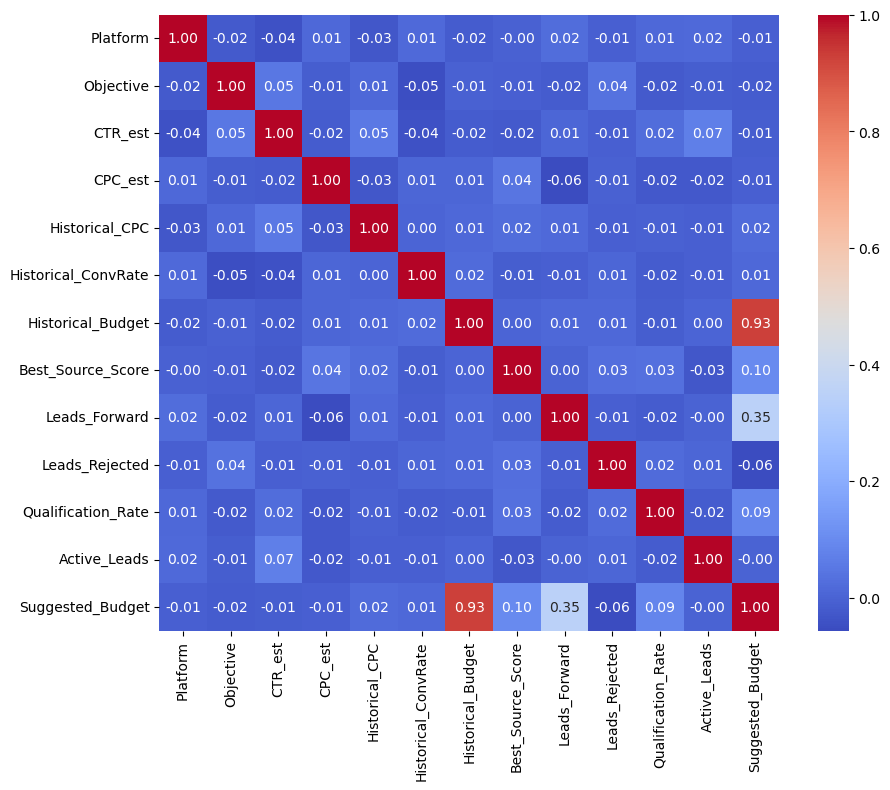

In [105]:
import seaborn as sns
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(),cmap="coolwarm",annot=True,fmt=".2f")

plt.show()

In [106]:
data.isnull().any()

Platform               False
Objective              False
CTR_est                False
CPC_est                False
Historical_CPC         False
Historical_ConvRate    False
Historical_Budget      False
Best_Source_Score      False
Leads_Forward          False
Leads_Rejected         False
Qualification_Rate     False
Active_Leads           False
Suggested_Budget       False
dtype: bool

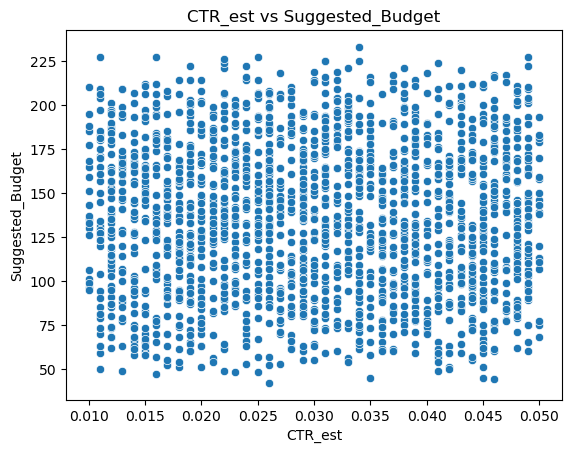

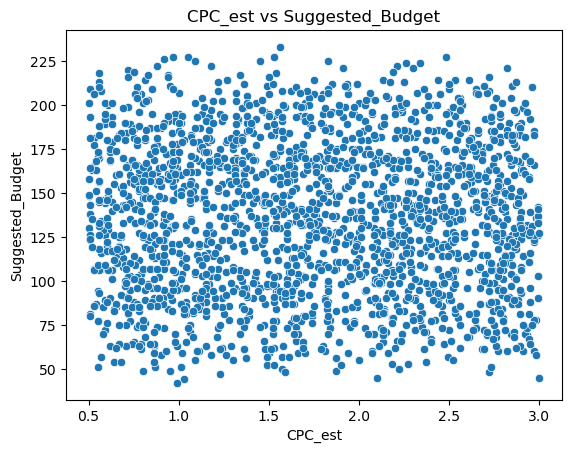

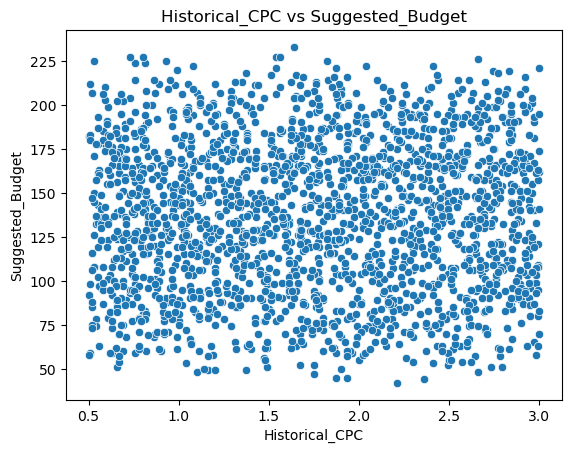

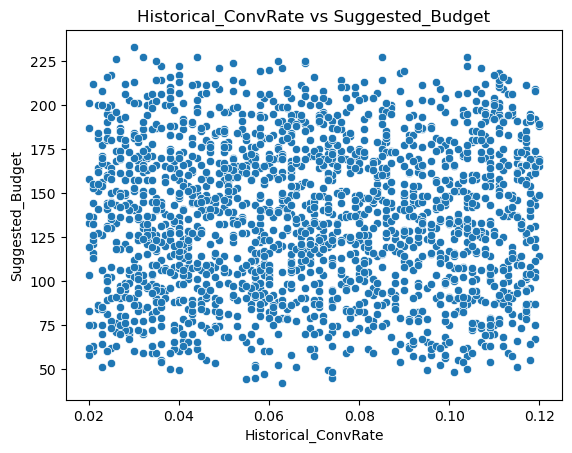

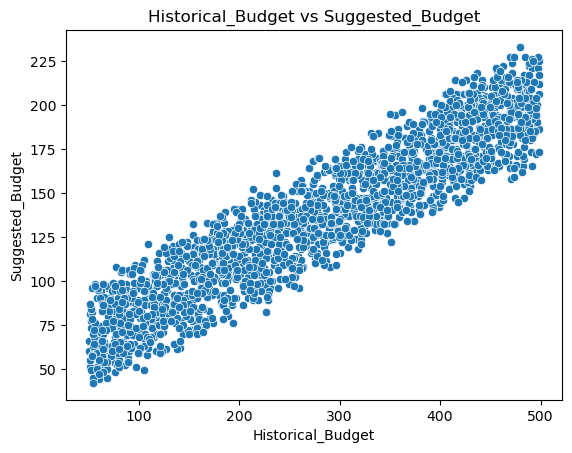

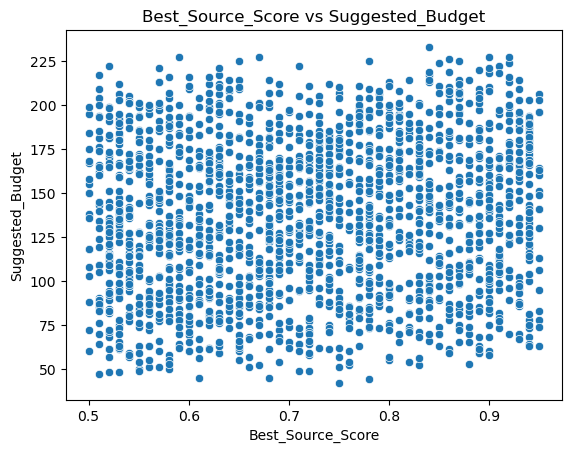

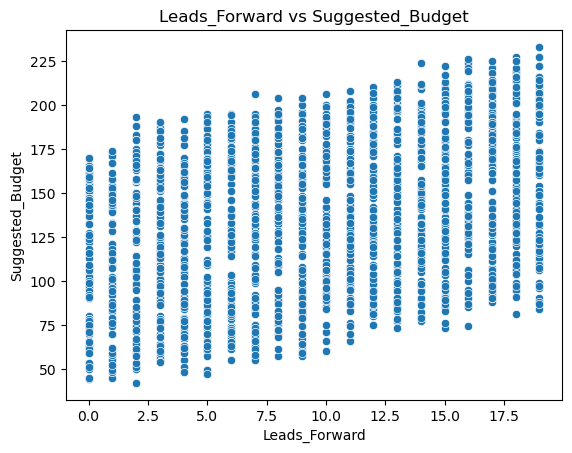

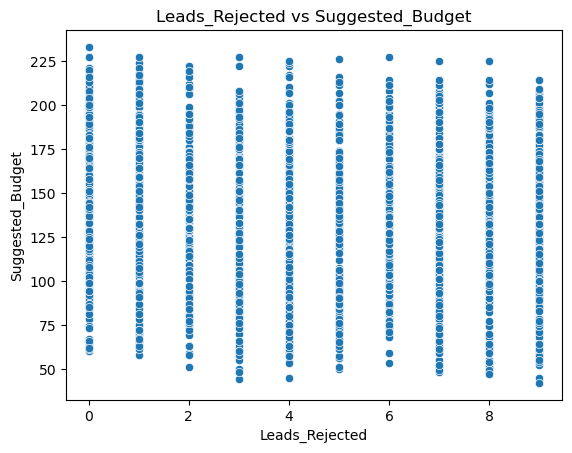

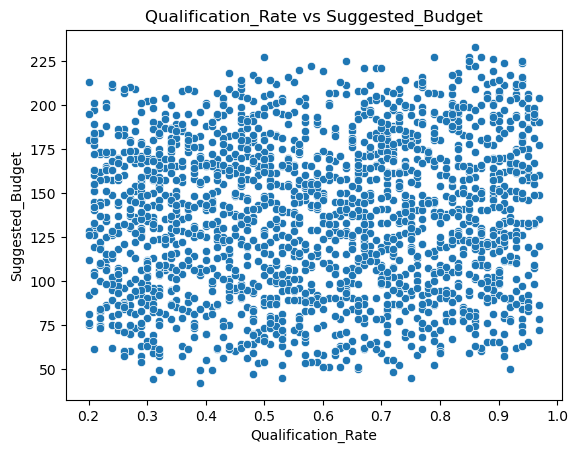

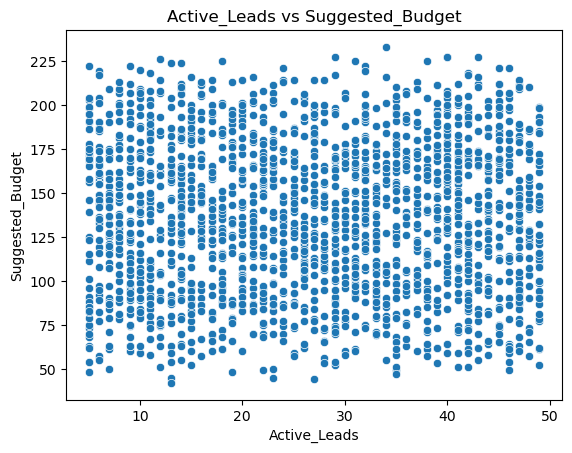

In [107]:
numeric_cols = data.select_dtypes(include='number').columns.tolist()
numeric_cols.remove("Suggested_Budget")

for col in numeric_cols:
    sns.scatterplot(x=data[col], y=data["Suggested_Budget"])
    plt.title(f"{col} vs Suggested_Budget")
    plt.show()

In [108]:
data

,Platform,Objective,CTR_est,CPC_est,Historical_CPC,Historical_ConvRate,Historical_Budget,Best_Source_Score,Leads_Forward,Leads_Rejected,Qualification_Rate,Active_Leads,Suggested_Budget
0,2.0000000000,1,0.0310000000,2.7800000000,1.7700000000,0.0580000000,351,0.5600000000,0,8,0.4300000000,32,122
1,0.0000000000,1,0.0340000000,1.1400000000,1.8700000000,0.0510000000,378,0.8400000000,0,8,0.8900000000,15,148
2,1.0000000000,0,0.0240000000,2.1900000000,1.3300000000,0.0880000000,137,0.8500000000,15,8,0.3900000000,11,103
3,1.0000000000,2,0.0470000000,2.2900000000,1.7900000000,0.1190000000,380,0.9200000000,0,6,0.4000000000,14,143
4,1.0000000000,0,0.0310000000,2.2000000000,0.8700000000,0.0900000000,204,0.5500000000,12,5,0.9100000000,31,120
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,2.0000000000,1,0.0220000000,1.7600000000,1.2400000000,0.0600000000,351,0.8500000000,14,5,0.4600000000,8,170
1996,2.0000000000,0,0.0410000000,2.1100000000,1.2900000000,0.0300000000,64,0.8800000000,14,7,0.6600000000,15,86
1997,0.0000000000,2,0.0120000000,2.2000000000,3.0000000000,0.1080000000,478,0.8200000000,8,9,0.8200000000,19,195
1998,2.0000000000,0,0.0160000000,0.7700000000,1.3800000000,0.1070000000,422,0.9300000000,7,5,0.6500000000,45,180


In [109]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler

In [110]:
x = data.drop("Suggested_Budget",axis=1)
y = data["Suggested_Budget"]
y
x_temp,x_test,y_temp,y_test = train_test_split(x,y,test_size=0.2,random_state=42)
x_train,x_cv,y_train,y_cv = train_test_split(x_temp,y_temp,test_size=0.3,random_state=42)

scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_cv = scaler.transform(x_cv)
x_test = scaler.transform(x_test)

In [111]:
model = SGDRegressor()
model.fit(x_train,y_train)

,loss,'squared_error'
,penalty,'l2'
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,1000
,tol,0.001
,shuffle,True
,verbose,0
,epsilon,0.1
,random_state,None


In [112]:
pred= model.predict(x_cv)
err = mean_squared_error(pred,y_cv)
errr = r2_score(pred,y_cv)
print(f"MSE {err} \n R2 {errr}")



MSE 0.09010621163732538 
 R2 0.999948528302098


In [113]:
model2 = tf.keras.Sequential([tf.keras.layers.Dense(50,activation="relu"),
                            tf.keras.layers.Dense(25,activation="relu"),
                            tf.keras.layers.Dense(1,activation="linear")])
model2.compile(loss= tf.keras.losses.MeanSquaredError(),optimizer=tf.keras.optimizers.Adam(),metrics="MSE")
model2.fit(x_train,y_train,epochs=1000)

Epoch 1/1000
35/35 [==============================] - 0s 2ms/step - loss: 20540.3027 - MSE: 20540.3027
Epoch 2/1000
35/35 [==============================] - 0s 1ms/step - loss: 19948.1289 - MSE: 19948.1289
Epoch 3/1000
35/35 [==============================] - 0s 1ms/step - loss: 18769.8711 - MSE: 18769.8711
Epoch 4/1000
35/35 [==============================] - 0s 1ms/step - loss: 16640.5078 - MSE: 16640.5078
Epoch 5/1000
35/35 [==============================] - 0s 1ms/step - loss: 13365.4756 - MSE: 13365.4756
Epoch 6/1000
35/35 [==============================] - 0s 1ms/step - loss: 9225.7002 - MSE: 9225.7002
Epoch 7/1000
35/35 [==============================] - 0s 1ms/step - loss: 5102.0498 - MSE: 5102.0498
Epoch 8/1000
35/35 [==============================] - 0s 1ms/step - loss: 2129.4102 - MSE: 2129.4102
Epoch 9/1000
35/35 [==============================] - 0s 1ms/step - loss: 738.4874 - MSE: 738.4874
Epoch 10/1000
35/35 [==============================] - 0s 1ms/step - loss: 344.9497

In [114]:
pred2 = model2.predict(x_cv).reshape(-1)

mse = tf.keras.losses.MeanSquaredError()

loss_value = mse(y_cv, pred2).numpy()
print(loss_value)

15/15 [==============================] - 0s 997us/step
0.53521144


In [115]:
y_train.shape

(1120,)

In [121]:
pred3= model.predict(x_test)
err = mean_squared_error(pred3,y_test)
errr = r2_score(pred3,y_test)
print(f"MSE {err} \n R2 {errr}")

import joblib
col = x.columns
joblib.dump(model,"model.pkl")
joblib.dump(scaler,"scaler.pkl")

print(col)

MSE 0.09054880841139097 
 R2 0.9999510942367633
Index(['Platform', 'Objective', 'CTR_est', 'CPC_est', 'Historical_CPC',
       'Historical_ConvRate', 'Historical_Budget', 'Best_Source_Score',
       'Leads_Forward', 'Leads_Rejected', 'Qualification_Rate',
       'Active_Leads'],
      dtype='object')


In [122]:
def predict(platform, objective,ctr_est,cpc_est, cpc, conv_rate, budget, score, leads_fwd, leads_rej, qual_rate, active_leads):
    platform_map = {"TikTok":0,"Facebook":1,"Google":2}
    objective_map = {"Traffic":0,"Awareness":1,"Conversions":2}
    
    X = pd.DataFrame([[platform_map[platform], objective_map[objective], ctr_est, cpc_est,
                   cpc, conv_rate, budget, score, leads_fwd, leads_rej,
                   qual_rate, active_leads]], columns=x.columns)

    X = scaler.transform(X) 
    
    pred = model.predict(X)

    if pred < 0:
        pred = np.array([0])
    return "Best budget Daily for your campaign is " + str(int(pred[0])) + "$"


In [123]:
import gradio as gd
data.describe()

,CTR_est,CPC_est,Historical_CPC,Historical_ConvRate,Historical_Budget,Best_Source_Score,Leads_Forward,Leads_Rejected,Qualification_Rate,Active_Leads,Suggested_Budget
count,2000.0000000000,2000.0000000000,2000.0000000000,2000.0000000000,2000.0000000000,2000.0000000000,2000.0000000000,2000.0000000000,2000.0000000000,2000.0000000000,2000.0000000000
mean,0.0300625000,1.7452550000,1.7656350000,0.0690715000,277.6150000000,0.7208700000,9.7145000000,4.5225000000,0.5863950000,26.7115000000,135.9395000000
std,0.0115409354,0.7247542130,0.7221256328,0.0288615468,131.1253740008,0.1305881684,5.7877230946,2.9332227409,0.2216910631,13.0640193681,42.4998701084
min,0.0100000000,0.5000000000,0.5000000000,0.0200000000,50.0000000000,0.5000000000,0.0000000000,0.0000000000,0.2000000000,5.0000000000,42.0000000000
25%,0.0200000000,1.1000000000,1.1275000000,0.0437500000,164.0000000000,0.6100000000,5.0000000000,2.0000000000,0.4000000000,15.0000000000,102.0000000000
50%,0.0300000000,1.7350000000,1.7700000000,0.0680000000,277.5000000000,0.7200000000,10.0000000000,5.0000000000,0.5900000000,27.0000000000,136.0000000000
75%,0.0400000000,2.3700000000,2.4000000000,0.0940000000,395.0000000000,0.8300000000,15.0000000000,7.0000000000,0.7700000000,38.0000000000,169.0000000000
max,0.0500000000,3.0000000000,3.0000000000,0.1200000000,499.0000000000,0.9500000000,19.0000000000,9.0000000000,0.9700000000,49.0000000000,233.0000000000


In [119]:
interface = gd.Interface(
    fn=predict,
    inputs=[
        gd.Dropdown(choices=["TikTok","Facebook","Google"], label="Platform"),
        gd.Dropdown(choices=["Traffic","Awareness","Conversions"], label="Objective"),
        gd.Slider(minimum=0, maximum=3, step=0.01, label="CTR_est"),
        gd.Slider(minimum=0, maximum=3, step=0.01, label="CPC_est"),
        gd.Slider(minimum=0, maximum=3, step=0.01, label="Historical_CPC"),
        gd.Slider(minimum=0, maximum=1, step=0.01, label="Historical_ConvRate"),
        gd.Slider(minimum=0, maximum=20000, step=100, label="Historical_Budget"),
        gd.Slider(minimum=0, maximum=1, step=0.01, label="Best_Source_Score"),
        gd.Slider(minimum=0, maximum=100, step=1, label="Leads_Forward"),
        gd.Slider(minimum=0, maximum=100, step=1, label="Leads_Rejected"),
        gd.Slider(minimum=0, maximum=1, step=0.01, label="Qualification_Rate"),
        gd.Slider(minimum=0, maximum=100, step=1, label="Active_Leads")
    ],
    outputs=gd.Text(),
    title="Ads Budget Predictor",
)

In [120]:
interface.launch()

* Running on local URL:  http://127.0.0.1:7866
* To create a public link, set `share=True` in `launch()`.
